In [30]:
from utils import map_size
import networkx as nx
import random
import json
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
# A function to create a 2D map with size map_size * map_size
def endnode_graph_gen(n, topoIdx):

    seed = 8848 + topoIdx
    random.seed(seed)
    G = nx.Graph()
    # manully add all nodes
    G.add_node(0, pos=(25, 60), type='endnode', num_qubits=10)
    G.add_node(1, pos=(30, 165), type='endnode', num_qubits=10)
    G.add_node(2, pos=(65, 110), type='endnode', num_qubits=10)
    G.add_node(3, pos=(150, 175), type='endnode', num_qubits=10)
    G.add_node(4, pos=(190, 45), type='endnode', num_qubits=10)
    G.add_node(5, pos=(180, 135), type='endnode', num_qubits=10)
    G.add_node(6, pos=(225, 200), type='endnode', num_qubits=10)
    G.add_node(7, pos=(275, 140), type='endnode', num_qubits=10)

    #for a map with size 285 * 215, generate a grid of 8 * 8
    for i in range(8):
        for j in range(8):
            G.add_node(8 + i * 8 + j, pos=(i * 40, j * 30), type='repeater', num_qubits=10)
    # Do Delaunay triangulation on the nodes
    pos = nx.get_node_attributes(G, 'pos')
    points = [pos[i] for i in range(G.number_of_nodes())]
    tri = Delaunay(points)
    delaunay_edges = []
    # Extract the edges from the Delaunay triangulation
    for simplex in tri.simplices:
        for i in range(3):
            for j in range(i+1, 3):
                delaunay_edges.append((simplex[i], simplex[j]))
                
    # Add the edges to the graph    
    for edge in delaunay_edges:
        G.add_edge(edge[0], edge[1], weight=random.randint(1, 10))  

    # plot the graph
    pos = nx.get_node_attributes(G, 'pos')
    point_colors = ['r' if G.nodes[i]['type'] == 'endnode' else 'b' for i in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=point_colors, node_size=10)
    nx.draw_networkx_edges(G, pos)
    plt.show()

    # Randomly generate n nodes with 2D coordinates, and add them to the graph
    # for i in range(n):
    #     #num_qubits = random.randint(1, 10)
    #     G.add_node(i, pos=(map_size * random.random(), map_size * random.random()), type='endnode', num_qubits=random.randint(10, 30))

    # dirPath = '../dist/endnodes/'
    # fileName = 'endnodesLocs-' + str(n) + '-' + str(topoIdx) + '.json'
    # with open(dirPath + fileName, 'w') as file:
    #     json.dump(nx.node_link_data(G), file)

    # file.close()

    # return dirPath + fileName

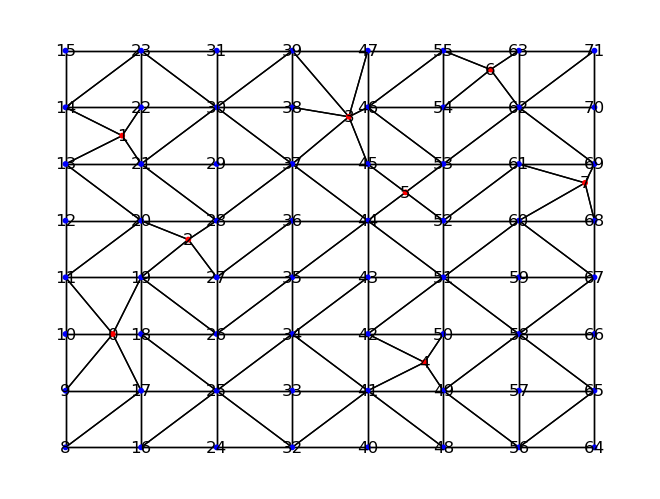

In [31]:
endnode_graph_gen(8, 0)

L= 400 N= 4 R= 121.97722616698678 L= 100.0
L= 500 N= 5 R= 60.69075013222668 L= 100.0
L= 600 N= 6 R= 30.197170958534876 L= 100.0
L= 700 N= 7 R= 15.024845333305265 L= 100.0
L= 800 N= 7 R= 8.17527084355453 L= 114.28571428571429
L= 1600 N= 15 R= 0.04162860356098805 L= 106.66666666666667
L= 3200 N= 29 R= 1.1211782308640913e-06 L= 110.34482758620689
L= 4800 N= 43 R= 2.8700093107542123e-11 L= 111.62790697674419


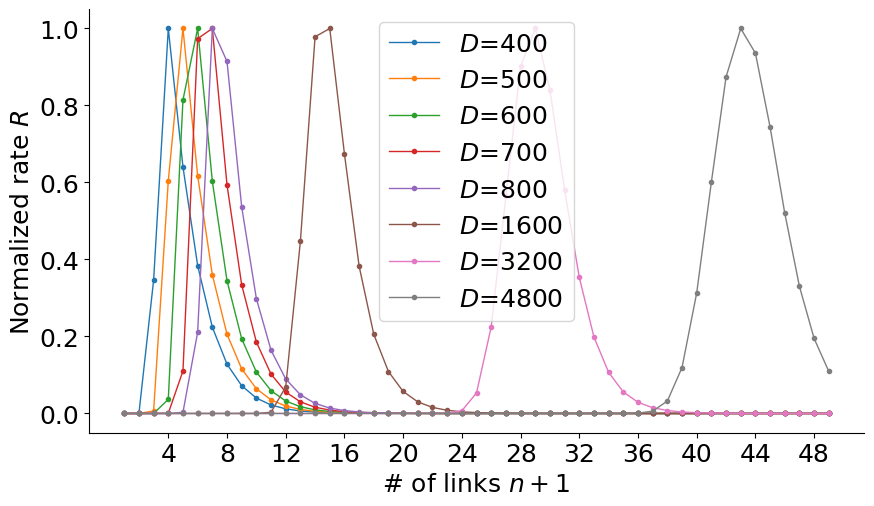

In [40]:
# Optimal path length
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def expression(L_all, N):
  q = 0.5
  M = 1000.0
  L_att = 22
  L = L_all / N
  p1 = (q) ** N
  p2 = (1 - (1 - q * np.exp(-L/(1 *L_att))) ** M) ** (N + 1)
  p0 = 200000 / L
  r =  ((q) ** N) * (1- (1- q * np.exp(-L/L_att)) ** M) ** (N + 1)
  return p0 * p1 * p2, L

max_N = 50
res = []
L_set = [400, 500, 600, 700, 800, 1600, 3200, 4800]#range(200, 6400, 100)#
step = 1
hop_set = range(1, max_N, step)
x_ticks = []


for i in range(1, max_N, step):
  x_ticks.append(str(i))
# L = 700

plt.figure(figsize=(10, 5.5))  # 例如，宽度10英寸，高度6英寸

for L in L_set:
  res = []
  n_max = 999
  res_max = 0
  for N in range(1, max_N, step):
    r, l = expression(L, N)
    #print (N, r, l)
    res.append(r)
    if r > res_max:
      res_max = r
      n_max = N
    # normalize the result
  print ("L=", L, "N=", n_max, "R=", res_max, "L=", L/n_max)
  #res = [r / max(res) for r in res]
  # Print the corresponding l value for max r
  
  plt.plot(hop_set, res / res_max, label="$D$=" + str(L), marker='o', linestyle='-', linewidth=1, markersize=3)
plt.legend(fontsize=18)
plt.xlabel('# of links $n + 1$', fontsize=18)
plt.ylabel('Normalized rate $R$', fontsize=18)
x_ticks = [int(x) for x in x_ticks if int(x) % 4 == 0]
# plt.xticks(hop_set, x_ticks, fontsize=10)
x_ticks_label = [str(x) for x in x_ticks]
plt.xticks(x_ticks,fontsize=18,)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=18)
#plt.yscale('log')
# plt.grid()
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# remove the white space

save_path = "../dist/figs/"
# transparent background
# plt.scatter(0, 0, alpha=0)
# plt.figure(figsize=(80, 80))  # 例如，宽度10英寸，高度6英寸
sns.despine()
plt.savefig(save_path + "fig-optimal_length.pdf", transparent=True)
# plt.savefig(save_path + "L_vs_N.png")

plt.show()

#plt.savefig(save_path + "L_vs_N.pdf")

# for N in range(1, max_N):
#   r, l = expression(L, N)
#   print (N, r, l)
#   res.append(r)

# # Plot the result
# import matplotlib.pyplot as plt
# import numpy as np
# plt.plot(range(1, max_N), res)



The result for L = 200 is: 0.9012364716745123
The result for L = 100 is: 0.999999999999999
The result for L = 125 is: 0.999999975298836
The result for L = 150 is: 0.9998645173111635
The result for L = 175 is: 0.989309543072674
The result for L = 200 is: 0.9012364716745123
The result for L = 250 is: 0.4529371455933645
The result for L = 300 is: 0.14552154756248525
The result for L = 350 is: 0.04017912180333849
The result for L = 400 is: 0.010636998301552403
The result for L = 500 is: 0.0007269772661141483


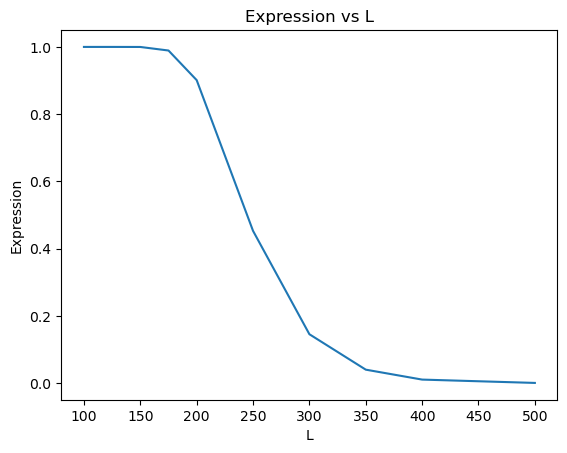

In [47]:
# Exponential decay
import numpy as np

# Define the variables
M = 1000
L_att = 37.2

# Define the function
def calculate_expression(L):
    single_succ = 1 - (1 - (0.5) * np.exp(-L / (1*L_att))) ** M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

def calculate_expression2(L):
    single_succ = 1 - (1 - (0.5) * np.exp(-L / L_att))  * M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

# Calculate the value for a specific L
L = 200  # Example value for L, change as needed
result = calculate_expression(L)

# Print the result
print(f"The result for L = {L} is: {result}")

# plot a figure with L = [100, 200, 300, 400, 500]
import matplotlib.pyplot as plt
Ls = [100, 125, 150, 175, 200, 250, 300, 350, 400, 500]
res = []
res2 = []
for L in Ls:
    res.append(calculate_expression(L))
    res2.append(calculate_expression2(L))
    print (f"The result for L = {L} is: {res[-1]}")

data_labels = [r for r in res]
plt.plot(Ls, res)
# plt.plot(Ls, res2)
plt.xlabel('L')
plt.ylabel('Expression')
plt.title('Expression vs L')
plt.show()


here 4


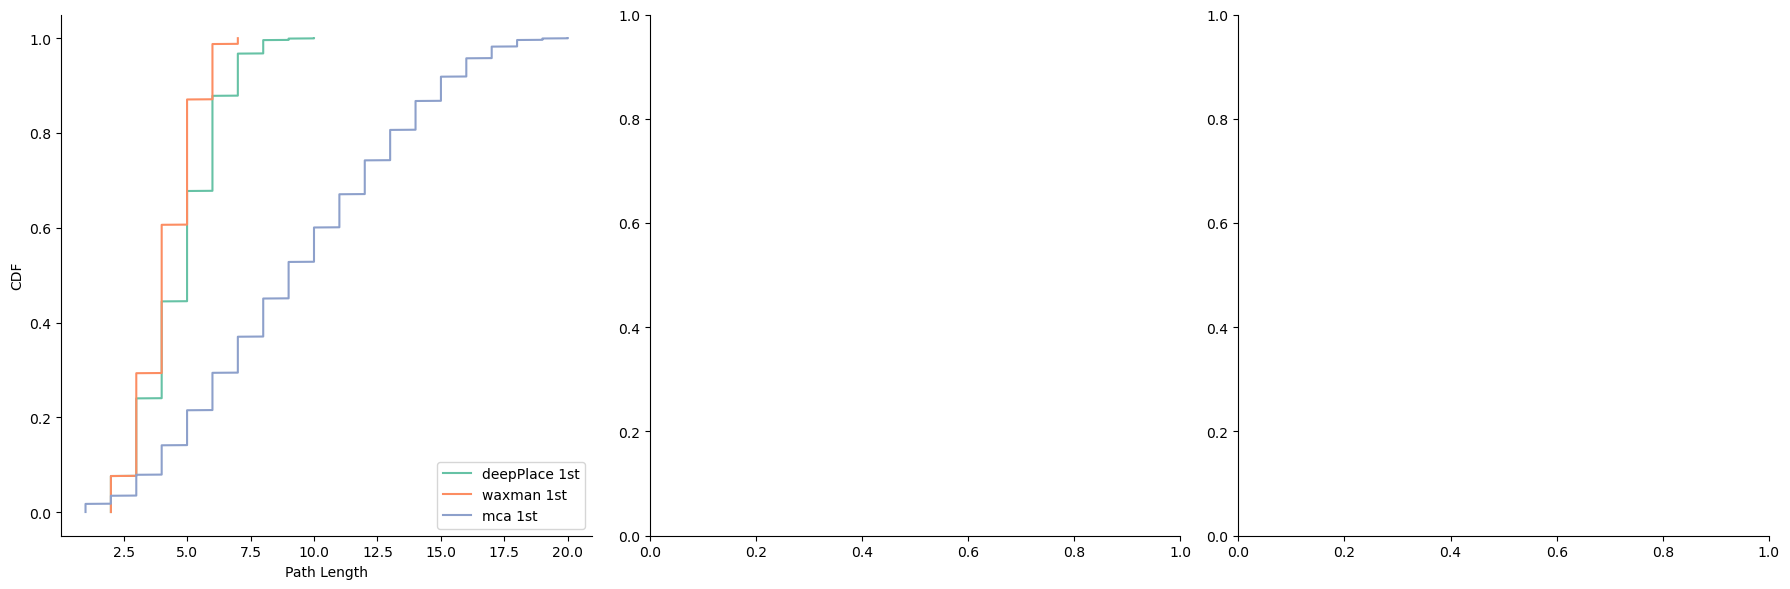

In [35]:
# Hop Count CDF 
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice
from config import abs_file_path

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman","mca"]
n_values = [100]#, 100, 200, 400]
topo_indices = range(1)
dir_path = abs_file_path + "/dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: {'1st': [], '2nd': [], '3rd': []} for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    #print("here 1")
                    for u, v in combinations(endnodes, 2):
                    # Random select 10 pairs of endnodes
                    # for i in range(1):
                    #     u, v = np.random.choice(endnodes, 2, replace=False)
                        try:
                            # has_circle = nx.has_path(G, u, v)
                            # print(u, v, "here", has_circle)

                            lengths = list(islice(nx.shortest_simple_paths(G, u, v, ), 3))#nx.shortest_path(G, u, v) #list(nx.shortest_path(G, u, v))[:1]#list(nx.shortest_simple_paths(G, u, v))[:3]
                            # print(lengths)
                            if len(lengths) > 0:
                                path_lengths[name][n]['1st'].append(len(lengths[0]) - 1)
                            if len(lengths) > 1:
                                path_lengths[name][n]['2nd'].append(len(lengths[1]) - 1)
                            if len(lengths) > 2:
                                path_lengths[name][n]['3rd'].append(len(lengths[2]) - 1)
                        except nx.NetworkXNoPath:
                            pass
                    #print("here 2")

# 绘制 CDF 图
def plot_cdf(data, label, color):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color)

#print("here 3")
colors = sns.color_palette("Set2", len(names))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig, axes = plt.subplots(1, 1, figsize=(18, 6))

for i, path_type in enumerate(['1st']):
    for name, color in zip(names, colors):
        all_lengths = []
        for n in n_values:
            all_lengths.extend(path_lengths[name][n][path_type])
        if all_lengths:
            plt.sca(axes[i])
            plot_cdf(all_lengths, f"{name} {path_type}", color)
    # axes[i].set_title(f"CDF of {path_type}-Shortest Path Lengths")
    axes[i].set_xlabel('Path Length')
    axes[i].set_ylabel('CDF')
    axes[i].legend()


plt.tight_layout()

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-hop_cdf.pdf", transparent=True)

plt.show()


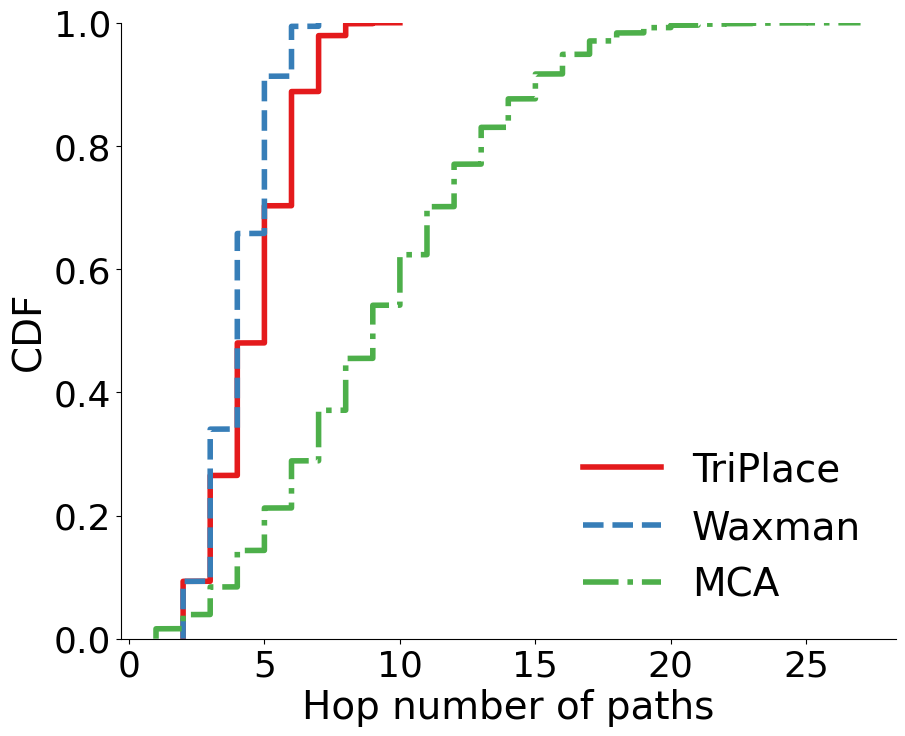

In [14]:
# Hop Count CDF
import os

import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice
from config import abs_file_path

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman","mca"]
n_values = [100]
topo_indices = range(10)
dir_path = abs_file_path + "/dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: {'1st': [], '2nd': [], '3rd': []} for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v), 3))
                            if len(lengths) > 0:
                                path_lengths[name][n]['1st'].append(len(lengths[0]) - 1)
                        except nx.NetworkXNoPath:
                            pass

# 绘制 CDF 图
# def plot_cdf(data, label, color):
#     data_sorted = np.sort(data)
#     cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
#     plt.plot(data_sorted, cdf, label=label, color=color)

def plot_cdf(data, label, color, line_style):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color, linestyle=line_style, linewidth=4)

colors = sns.color_palette("Set1", len(names))
line_styles = ['-', '--', '-.']
plt.figure(figsize=(10, 8))
for name, color, line_style in zip(names, colors, line_styles):
    all_lengths = []
    for n in n_values:
        all_lengths.extend(path_lengths[name][n]['1st'])
    if all_lengths:
        plot_cdf(all_lengths, f"{name}", color, line_style)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

plt.xlabel('Hop number of paths', fontsize=28)
plt.ylabel('CDF', fontsize=28)
plt.ylim(0, 1)
plt.legend(loc='best', fontsize=28, labels=[lengendMapping[name] for name in names], frameon=False)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
sns.despine()

save_path = "../dist/figs/"
plt.savefig(save_path + "fig-hop_cdf.pdf", transparent=True)

plt.show()


here 4


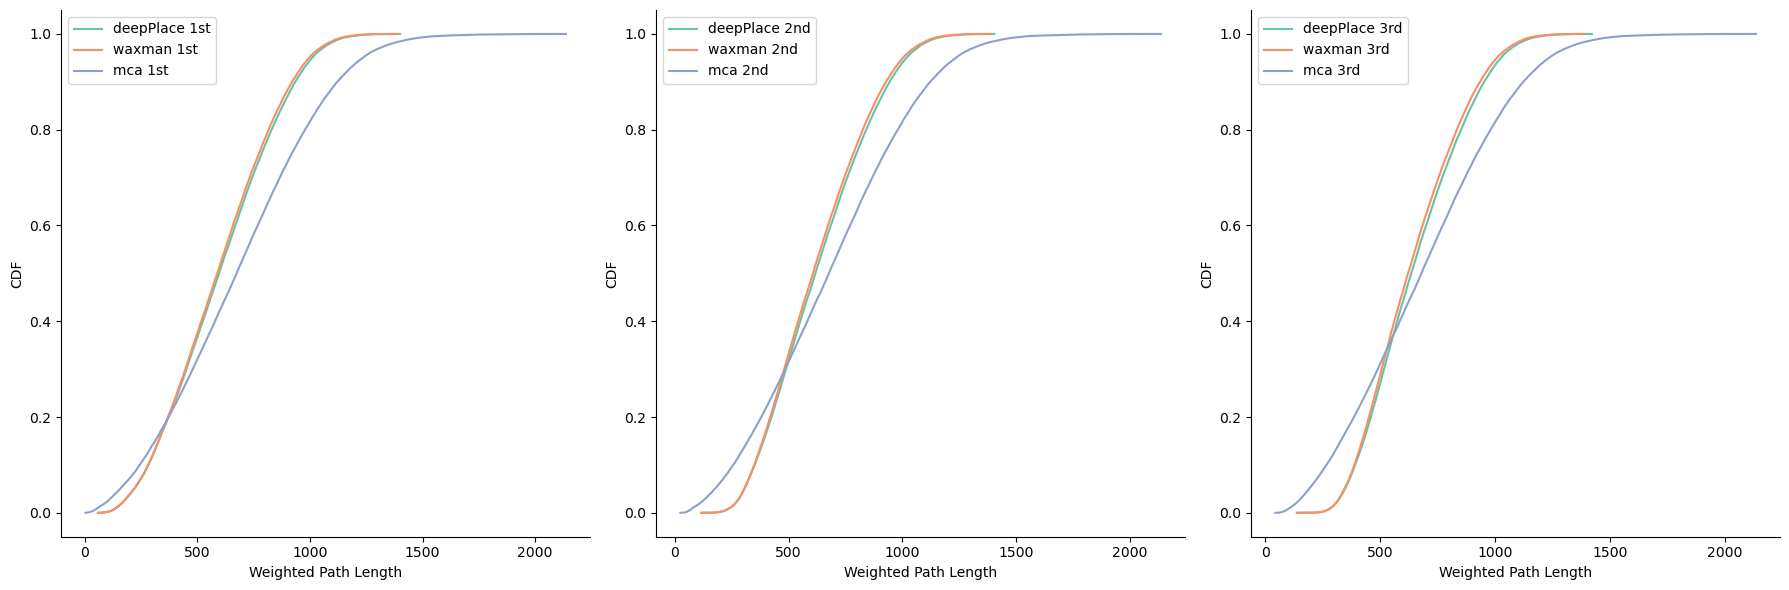

In [1]:
# path length CDF
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice
from config import abs_file_path

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman",  "mca"]
n_values = [100]#[25, 50, 100, 200, 400]
topo_indices = range(10)
dir_path = abs_file_path +  "/dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: {'1st': [], '2nd': [], '3rd': []} for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    #print("here 1")
                    for u, v in combinations(endnodes, 2):
                    # Random select 10 pairs of endnodes
                    # for i in range(1):
                    #     u, v = np.random.choice(endnodes, 2, replace=False)
                        try:
                            # has_circle = nx.has_path(G, u, v)
                            # print(u, v, "here", has_circle)

                            lengths = list(islice(nx.shortest_simple_paths(G, u, v, weight='dis'), 3))#nx.shortest_path(G, u, v) #list(nx.shortest_path(G, u, v))[:1]#list(nx.shortest_simple_paths(G, u, v))[:3]
                            # print(lengths)
                            if len(lengths) > 0:
                                dis_sum = 0
                                for i in range(len(lengths[0]) - 1):
                                    dis_sum += G[lengths[0][i]][lengths[0][i + 1]]['dis']
                                path_lengths[name][n]['1st'].append(dis_sum) #len(lengths[0]) - 1)
                            if len(lengths) > 1:
                                dis_sum = 0
                                for i in range(len(lengths[1]) - 1):
                                    dis_sum += G[lengths[1][i]][lengths[1][i + 1]]['dis']
                                path_lengths[name][n]['2nd'].append(dis_sum) #len(lengths[1]) - 1)
                            if len(lengths) > 2:
                                dis_sum = 0
                                for i in range(len(lengths[2]) - 1):
                                    dis_sum += G[lengths[2][i]][lengths[2][i + 1]]['dis']
                                path_lengths[name][n]['3rd'].append(dis_sum) #len(lengths[2]) - 1
                        except nx.NetworkXNoPath:
                            pass
                    #print("here 2")

# 绘制 CDF 图
def plot_cdf(data, label, color):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color)

#print("here 3")
colors = sns.color_palette("Set2", len(names))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, path_type in enumerate(['1st', '2nd', '3rd']):
    for name, color in zip(names, colors):
        all_lengths = []
        for n in n_values:
            all_lengths.extend(path_lengths[name][n][path_type])
        if all_lengths:
            plt.sca(axes[i])
            plot_cdf(all_lengths, f"{name} {path_type}", color)
    # axes[i].set_title(f"CDF of {path_type}-Shortest Path Lengths")
    axes[i].set_xlabel('Normalized Path Length')
    axes[i].set_ylabel('CDF')
    axes[i].legend()

print("here 4")
plt.tight_layout()
save_path = "../dist/figs/"
# transparent background
# plt.scatter(0, 0, alpha=0)
# plt.figure(figsize=(80, 80))  # 例如，宽度10英寸，高度6英寸
sns.despine()
plt.savefig(save_path + "fig-path_cdf.pdf", transparent=True)

plt.show()


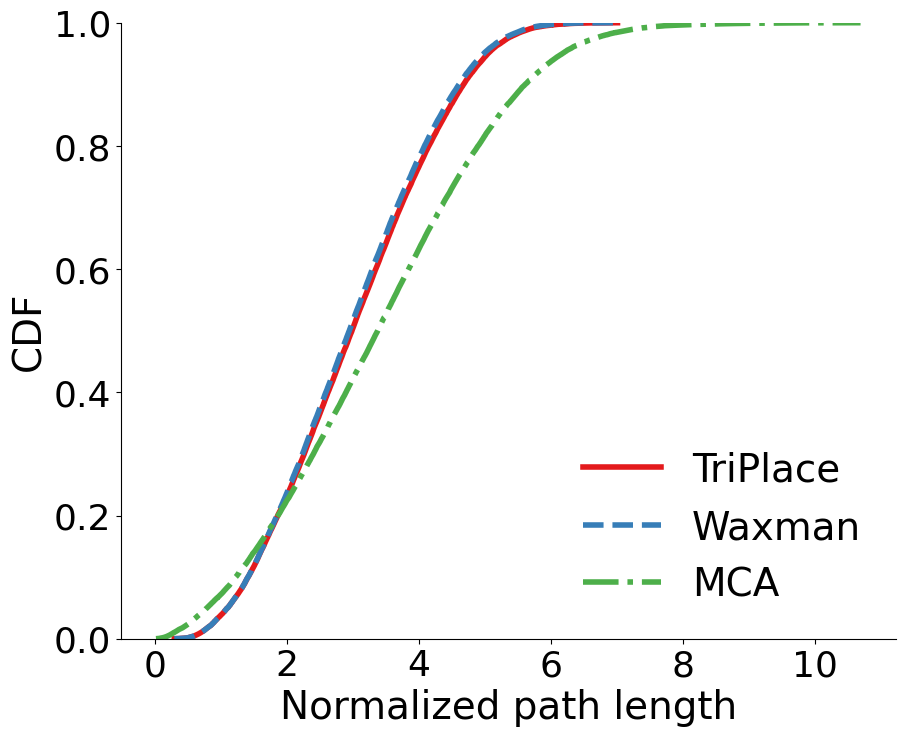

In [23]:
# path length CDF 1 pic
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice
from config import abs_file_path

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "mca"]
n_values = [100]
topo_indices = range(10)
dir_path = abs_file_path + "/dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: {'1st': [], '2nd': [], '3rd': []} for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v, weight='dis'), 3))
                            if len(lengths) > 0:
                                dis_sum = 0
                                for i in range(len(lengths[0]) - 1):
                                    dis_sum += G[lengths[0][i]][lengths[0][i + 1]]['dis']
                                path_lengths[name][n]['1st'].append(dis_sum / 200)
                        except nx.NetworkXNoPath:
                            pass

# 绘制 CDF 图
def plot_cdf(data, label, color, line_style):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color, linestyle=line_style, linewidth=4)

colors = sns.color_palette("Set1", len(names))
line_styles = ['-', '--', '-.']

plt.figure(figsize=(10, 8))
for name, color, line_style in zip(names, colors, line_styles):
    all_lengths = []
    for n in n_values:
        all_lengths.extend(path_lengths[name][n]['1st'])
    if all_lengths:
        plot_cdf(all_lengths, f"{name} 1st", color, line_style)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}
sns.despine()
plt.xlabel('Normalized path length', fontsize=28)
plt.ylabel('CDF', fontsize=28)
plt.ylim(0, 1)
plt.legend(loc='best', fontsize=28, labels=[lengendMapping[name] for name in names], frameon=False)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

save_path = "../dist/figs/"
plt.savefig(save_path + "fig-path_cdf.pdf", transparent=True)

plt.show()


/tmp/ipykernel_2931805/832360703.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=26)


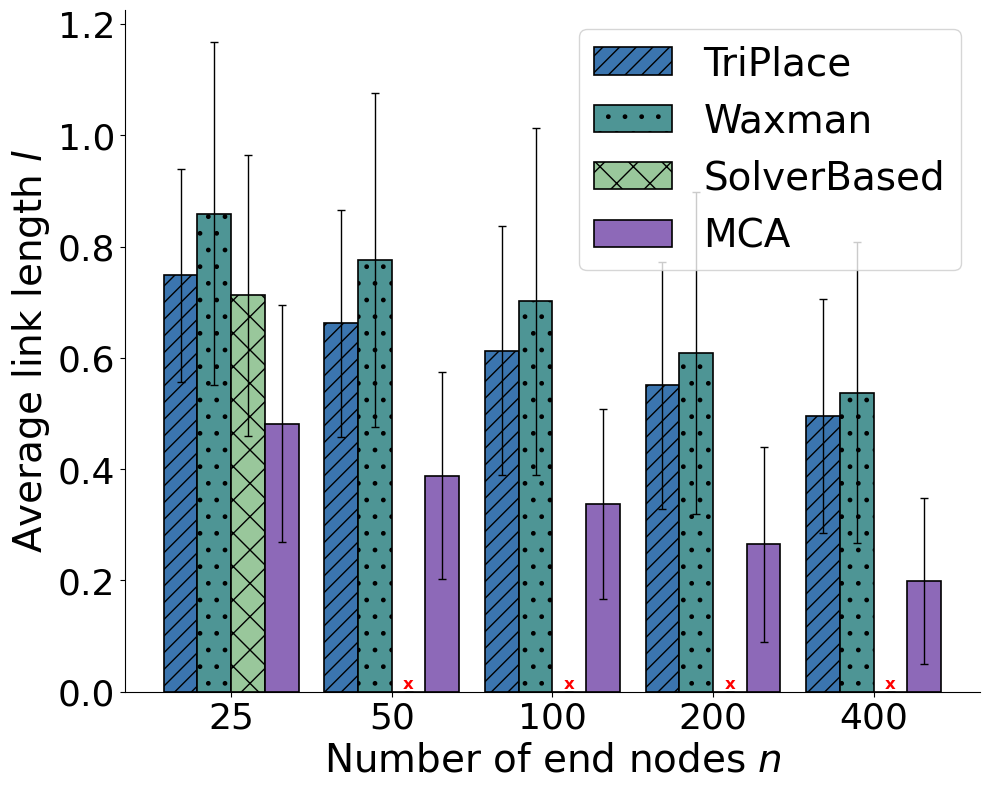

In [1]:
# Normalilzed edge length vs. number of end nodes
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from config import abs_file_path, l_er
from utils import add_dis_attr_to_edges


# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "solverBased", "mca"]
n_values = [25, 50, 100, 200, 400]
topo_indices = range(10)
file_path = abs_file_path + "/dist/topos/"
#print("file_path:", file_path)
# 初始化存储结果的字典
edge_lengths = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取边的属性 'dis'
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = file_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                # print("exits file_name:", filename)
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    G = add_dis_attr_to_edges(G)
                    # repeater_edges = [(u, v) for u, v in G.edges() if G[u][v]['type'] == 'repeater']
                    # lengths = [G[u][v]['dis'] for u, v in repeater_edges]
                    lengths = [attr['dis'] for u, v, attr in G.edges(data=True) if 'dis' in attr]
                    # Normalize the edge length
                    l_max = 200#max(lengths)
                    lengths = [l / l_er for l in lengths]
                    if name == "deepPlace":
                        #print("min:", min(lengths), "max:", max(lengths), "mean:", np.mean(lengths))
                        for dis in lengths:
                            assert dis > 0
                    if lengths:
                        edge_lengths[name][n].append(lengths)

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}




for name in names:
    for n in n_values:
        all_lengths = [length for lengths in edge_lengths[name][n] for length in lengths]
        if all_lengths:
            avg = np.mean(all_lengths)
            err = np.std(all_lengths)
            #err = #np.ptp(all_lengths)  # ptp (peak-to-peak) 计算最大值和最小值的差
            #print(f"{name} {n}: {avg} ± {err}")
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = ["#3b75af", "#4e9595", "#99c79b", "#8d69b8"]
bar_hatch = ['//', '.', 'x', '']

# 绘制柱状图和误差条
fig, ax = plt.subplots(figsize=(10, 8) )

bar_width = 0.21
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
           capsize=3, error_kw=dict(elinewidth=1, capthick=1), hatch=bar_hatch[i], edgecolor='black', linewidth=1.2)
    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}


ax.set_xlabel('Number of end nodes $n$', fontsize=28)
ax.set_ylabel('Average link length $l$', fontsize=28)
# ax.set_title('Average Edge Length vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values, fontsize=26)
# ax.set_yticklabels(labels=range(0, 1.21, 0.2), fontsize=26)
ax.set_yticklabels(labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=26)
ax.legend(labels=[lengendMapping[name] for name in names], fontsize=28, frameon=True)

# 优化图形显示效果
sns.despine()
plt.tight_layout()
plt.savefig(abs_file_path + "/dist/figs/fig-avg_edge_length.pdf", transparent=True)
plt.show()


/tmp/ipykernel_2757840/1309819318.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 161, 20), fontsize=20)


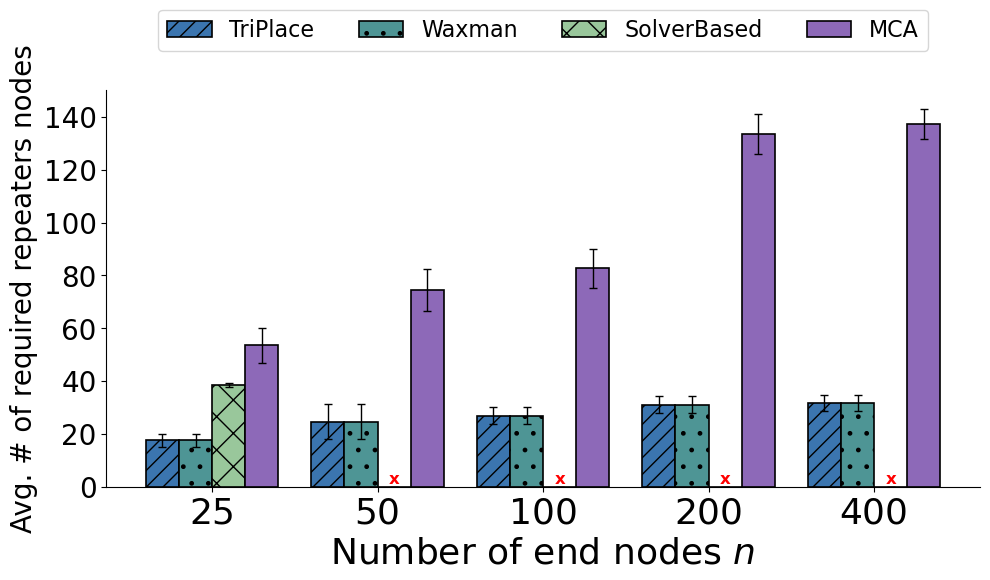

In [28]:
# repeater number vs. end node number n
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "solverBased", "mca"]
n_values = [25, 50, 100, 200, 400]
topo_indices = range(10)
dir_path = "../dist/topos/"
# 初始化存储结果的字典
results = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取 repeater 节点的数量
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    repeater_count = sum(1 for _, attr in G.nodes(data=True) if attr.get('type') == 'repeater')
                    results[name][n].append(repeater_count)

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = results[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)#np.ptp(values)  # ptp (peak-to-peak) 计算最大值和最小值的差
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
#colors = sns.color_palette("Set4", len(names))
colors = ["#3b75af", "#4e9595", "#99c79b", "#8d69b8"]
bar_hatch = ['//', '.', 'x', '']
# 绘制柱状图和误差条
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1), hatch=bar_hatch[i], edgecolor='black', linewidth=1.2)

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of end nodes $n$', fontsize=26)
ax.set_ylabel('Avg. # of required repeaters nodes', fontsize=20)
# ax.set_title('Average Number of Repeaters vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values, fontsize=26)
ax.set_yticklabels(range(0, 161, 20), fontsize=20)
lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

ax.legend(fontsize=16, loc='center', bbox_to_anchor=(0.5, 1.15), ncol=4, labels=[lengendMapping[name] for name in names])

# 优化图形显示效果

sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-n_vs_rptr_num.pdf", transparent=True)
plt.show()


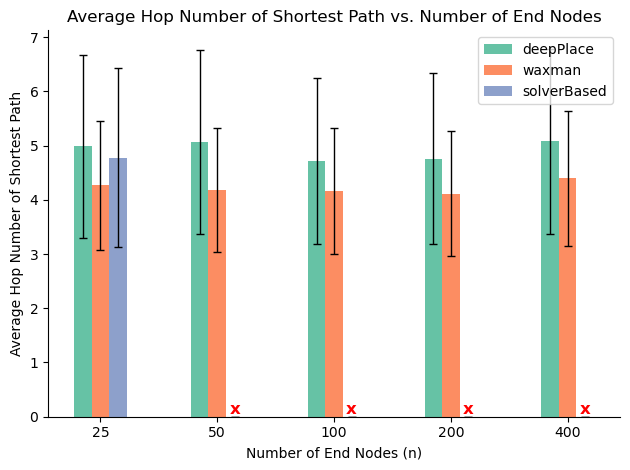

In [36]:
# Average hop number of shortest path vs. number of end nodes
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "solverBased"]
n_values = [25, 50, 100, 200, 400]
topo_indices = range(1)
dir_path = "../dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v), 3))
                            if len(lengths) > 0:
                                path_lengths[name][n].append(len(lengths[0]) - 1)
                        except nx.NetworkXNoPath:
                            pass
                        
# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = path_lengths[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set2", len(names))

# 绘制柱状图和误差条
fig, ax = plt.subplots()

bar_width = 0.15
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1))

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of End Nodes (n)')
ax.set_ylabel('Average Hop Number of Shortest Path')
ax.set_title('Average Hop Number of Shortest Path vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values)
ax.legend()

# 优化图形显示效果
sns.despine()
plt.tight_layout()
# save_path = "../dist/"
# plt.savefig(save_path + "fig-n_vs_hop_num.pdf", transparent=True)
save_path = "../dist/figs/"
# sns.despine()
plt.savefig(save_path + "fig-hop_vs_n.pdf", transparent=True)

plt.show()

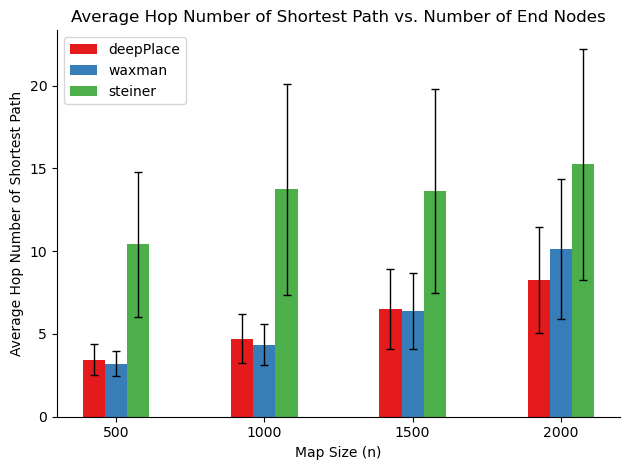

In [39]:
# Average hop number of shortest path vs. L_max
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman",  "steiner"]
map_size_values = [500, 1000, 1500, 2000]
topo_indices = range(1)
dir_path = "../dist/topos/map_size/"
# 存储所有跳数数据
path_lengths = {name: {n: [] for n in map_size_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in map_size_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-100-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v), 3))
                            if len(lengths) > 0:
                                path_lengths[name][n].append(len(lengths[0]) - 1)
                        except nx.NetworkXNoPath:
                            pass
                        
# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in map_size_values:
        values = path_lengths[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set1", len(names))

# 绘制柱状图和误差条
fig, ax = plt.subplots()

bar_width = 0.15
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1))

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Map Size (n)')
ax.set_ylabel('Average Hop Number of Shortest Path')
# ax.set_title('Average Hop Number of Shortest Path vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(map_size_values)
ax.legend()

# 优化图形显示效果
sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-hop_vs_map.pdf", transparent=True)
plt.show()

/tmp/ipykernel_2605430/433822783.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 17, 2), fontsize=36)


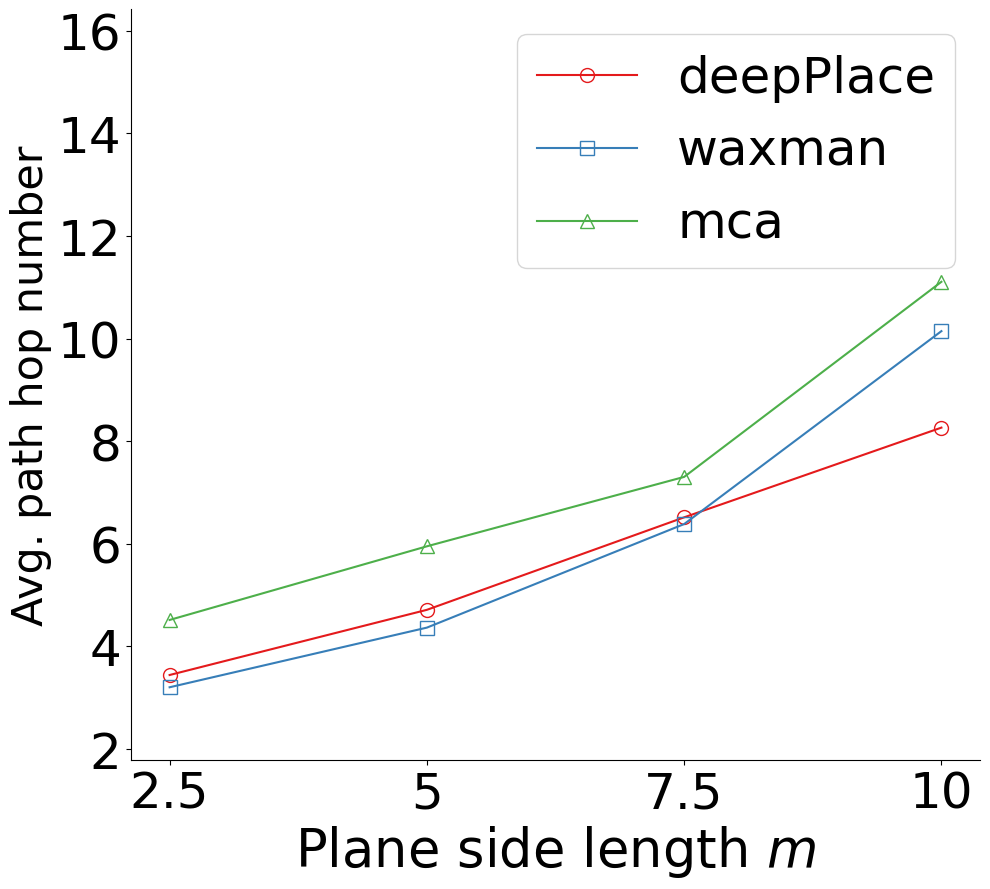

In [58]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations, islice

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "mca"]
map_size_values = [2.5, 5, 7.5, 10]
map_size_values_mapping = {2.5: 500, 5: 1000, 7.5: 1500, 10: 2000}
topo_indices = range(1)
dir_path = "../dist/topos/map_size/"
# 存储所有跳数数据
path_lengths = {name: {n: [] for n in map_size_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in map_size_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{map_size_values_mapping[n]}-100-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v), 3))
                            if len(lengths) > 0:
                                path_lengths[name][n].append(len(lengths[0]) - 1)
                        except nx.NetworkXNoPath:
                            pass

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in map_size_values:
        values = path_lengths[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set1", len(names))
markers = ['o', 's', '^', 'd']

# 绘制折线图和误差条
fig, ax = plt.subplots(figsize=(10, 9))

for i, (name, color, marker) in enumerate(zip(names, colors, markers)):
    ax.errorbar(map_size_values, averages[name], yerr=errors[name], label=name, color=color, capsize=0, fmt=f'-{marker}', 
                markersize=10, elinewidth=0, capthick=0, markerfacecolor='none', markeredgecolor=color)

ax.set_xlabel('Plane side length $m$', fontsize=38)
ax.set_ylabel('Avg. path hop number', fontsize=31)
ax.set_xticks(map_size_values)
ax.set_xticklabels(map_size_values, fontsize=36)
ax.set_yticklabels(range(0, 17, 2), fontsize=36)
ax.legend(fontsize=36)

# 调整其他文本元素的字体大小
# ax.tick_params(axis='both', which='major', labelsize=36)
ax.legend(loc='best', fontsize=36)

# 优化图形显示效果
sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-hop_vs_map.pdf", transparent=True)
plt.show()


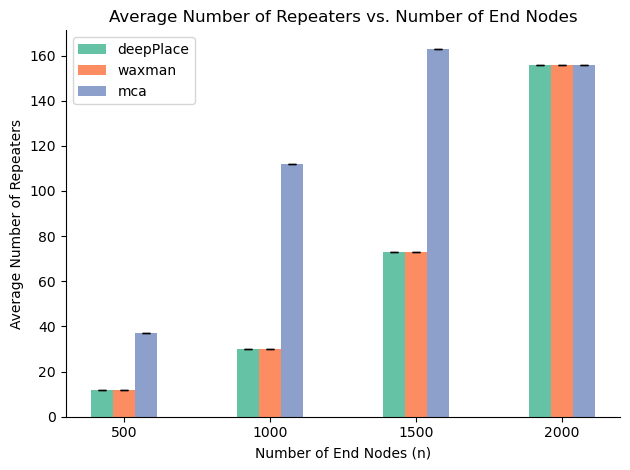

In [29]:
# repeater number vs. map size
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "mca"]
n_values = [500, 1000, 1500, 2000]
topo_indices = range(1)
dir_path = "../dist/topos/map_size/"
# 初始化存储结果的字典
results = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取 repeater 节点的数量
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-100-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    repeater_count = sum(1 for _, attr in G.nodes(data=True) if attr.get('type') == 'repeater')
                    results[name][n].append(repeater_count)

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = results[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)#np.ptp(values)  # ptp (peak-to-peak) 计算最大值和最小值的差
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set2", len(names))

# 绘制柱状图和误差条
fig, ax = plt.subplots()

bar_width = 0.15
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1))

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of End Nodes (n)')
ax.set_ylabel('Average Number of Repeaters')
ax.set_title('Average Number of Repeaters vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values)
ax.legend()

# 优化图形显示效果

sns.despine()
plt.tight_layout()
save_path = "../dist/"
plt.savefig(save_path + "fig-map_vs_rptr_num.pdf", transparent=True)
plt.show()


/tmp/ipykernel_3101102/1511256424.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 161, 20), fontsize=36)


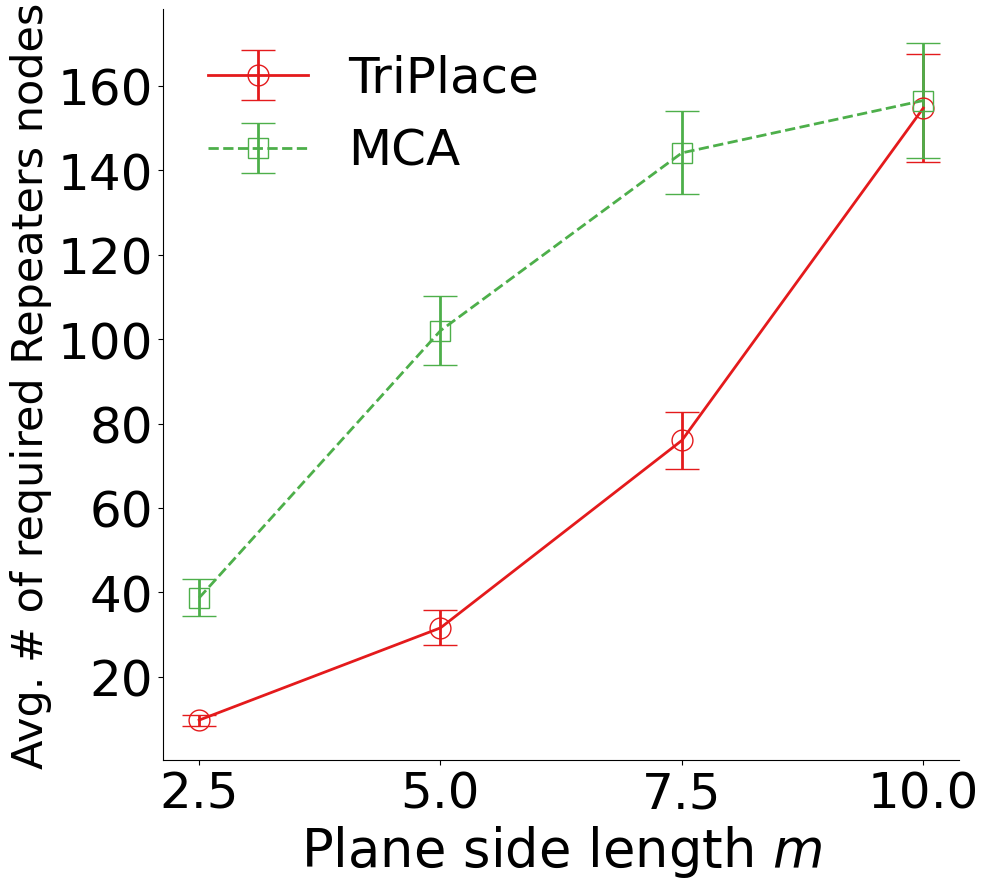

In [4]:
# repeater number vs. map_size
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define names, number of nodes, and topology indices
names = ["deepPlace", "mca"]
n_values = [2.5, 5, 7.5, 10]#[500, 1000, 1500, 2000]
topo_indices = range(10)
dir_path = "../dist/topos/map_size/"

# Initialize dictionary to store results
results = {name: {n: [] for n in n_values} for name in names}

# Read JSON files and extract the number of repeater nodes
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{int(n*200)}-100-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    repeater_count = sum(1 for _, attr in G.nodes(data=True) if attr.get('type') == 'repeater')
                    results[name][n].append(repeater_count)

# Calculate averages and errors
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = results[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)  # np.ptp(values)  # ptp (peak-to-peak) calculates the difference between the maximum and minimum values
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# Use seaborn color palette
colors = sns.color_palette("Set1", len(names)+1)
colors[1] = colors[2]
markers = ['o', 's', '^', 'd']
line_styles = ['-', '--', '-.', ':']
# Plot line graph with error bars
fig, ax = plt.subplots(figsize=(10, 9))

for i, (name, color, marker, line_style) in enumerate(zip(names, colors, markers, line_styles)):
    ax.errorbar(n_values, averages[name], yerr=errors[name], label=name, color=color, capsize=12, fmt=line_style+marker, markersize=15, markerfacecolor='none', elinewidth=2, capthick=1, linewidth=2)


    # # Add red 'x' marks for positions with no data
    # for j, avg in enumerate(averages[name]):
    #     if avg == 0:
    #         ax.text(n_values[j], 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

ax.set_xlabel('Plane side length $m$', fontsize=38)
ax.set_ylabel('Avg. # of required Repeaters nodes', fontsize=31)
# ax.set_title('Average Number of Repeaters vs. Number of End Nodes')
n_values = np.array(n_values) 

ax.set_xticks(n_values.tolist())
ax.set_xticklabels(n_values, fontsize=36)
ax.set_yticklabels(range(0, 161, 20), fontsize=36)
plt.legend(loc='best', fontsize=36, labels=[lengendMapping[name] for name in names], frameon=False)

# Optimize the display
sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-map_size_vs_rptr_num.pdf", transparent=True)
plt.show()


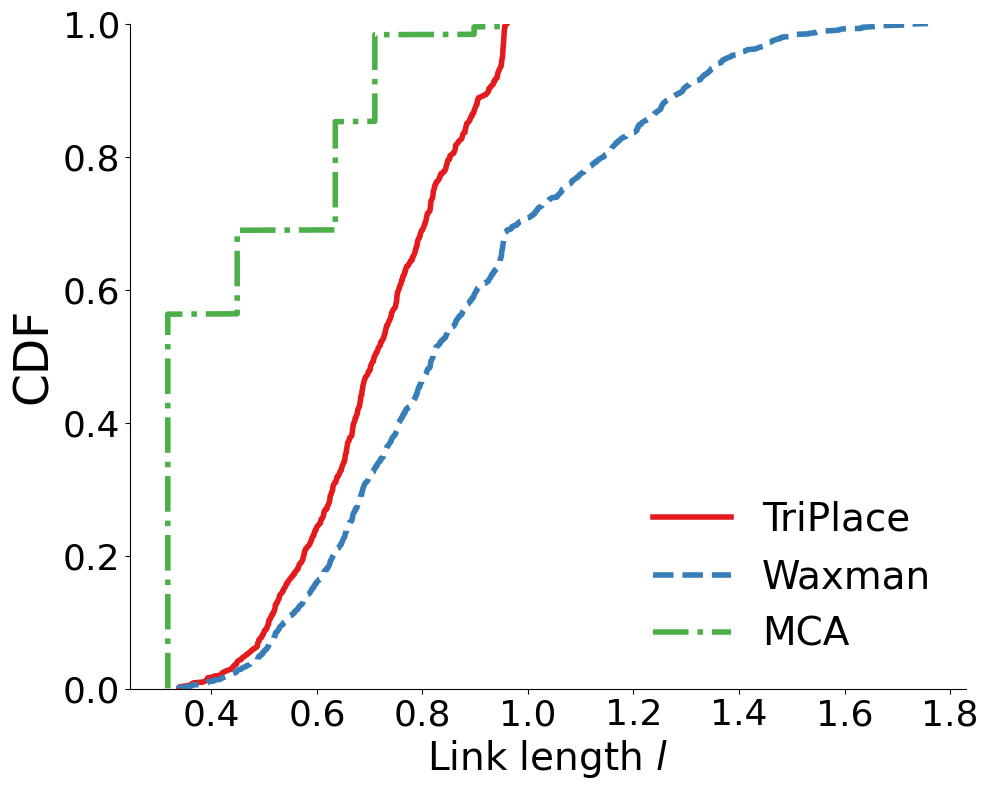

In [22]:
# Edge length CDF
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from config import abs_file_path

# 定义名称和拓扑索引
names = ["deepPlace", "waxman",  "mca"]
topo_indices = range(10)

# 存储边属性 'dis'
edge_dis = {name: [] for name in names}

# 读取 JSON 文件并提取 'repeater' 边的属性 'dis'
for name in names:
    for topo_idx in topo_indices:
        filename = abs_file_path + "/dist/topos/" + f"{name}-100-{topo_idx}.json"
        # print("filename:", filename)
        if os.path.exists(filename):
            with open(filename, 'r') as f:
                data = json.load(f)
                G = nx.node_link_graph(data)
                dis_values = [attr['dis'] for u, v, attr in G.edges(data=True) if 'type' in attr and attr['type'] == 'repeater' and 'dis' in attr]
                # dis_values = [attr['dis'] for u, v, attr in G.edges(data=True) if 'type' in attr and 'dis' in attr]
                # Normalize the edge length
                l_max = 210#max(dis_values)
                dis_values = [l / l_max for l in dis_values]
                edge_dis[name].extend(dis_values)

# 绘制 CDF 图
def plot_cdf(data, label, color, line_style):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color, linestyle=line_style, linewidth=4)

colors = sns.color_palette("Set1", len(names))
line_styles = ['-', '--', '-.']

plt.figure(figsize=(10, 8))

for name, color, line_style in zip(names, colors, line_styles):
    if edge_dis[name]:
        plot_cdf(edge_dis[name], name, color, line_style)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}
# plt.title('CDF of Edge "dis" for Repeaters')
plt.xlabel('Link length $l$', fontsize=28)
plt.ylabel('CDF', fontsize=34)
plt.ylim(0, 1)
plt.legend(loc='best', fontsize=28, labels=[lengendMapping[name] for name in names], frameon=False)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# plt.grid(True)

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-edge_cdf.pdf", transparent=True)
plt.tight_layout()
plt.show()



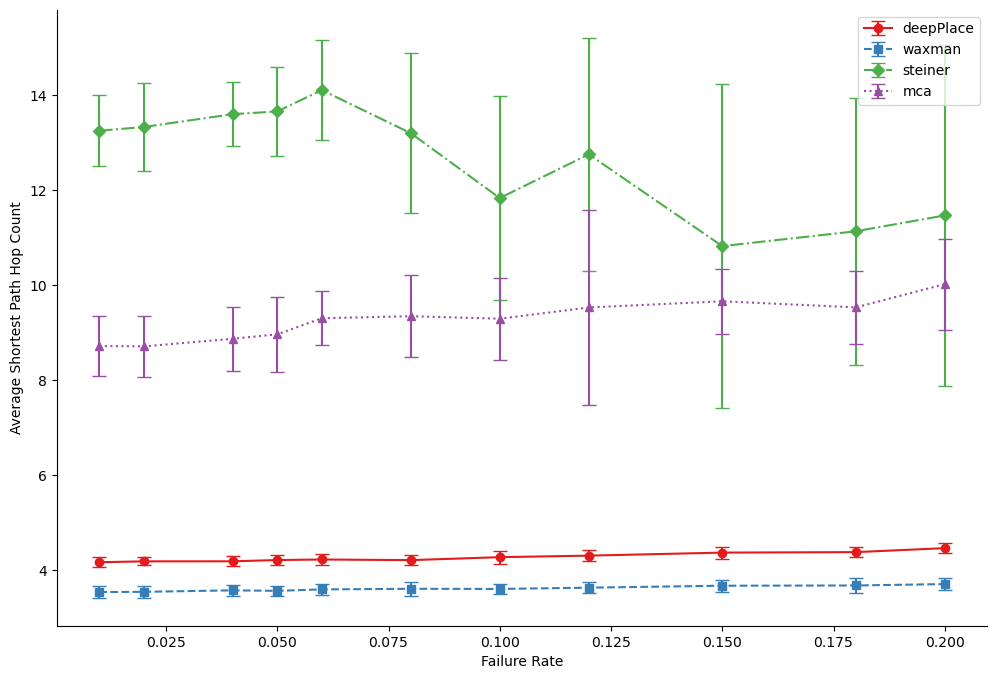

In [5]:
# Hop Count vs. Failure Rate (Only reachable pathes)
import os
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import abs_file_path
from topo_resilience_eval import G_removed_edges

# 定义函数以加载图并根据failure_rate删除边
# def G_removed_edges(topo_file_name, failure_rate):
#     with open(topo_file_name, 'r') as f:
#         data = json.load(f)
#     G = nx.node_link_graph(data)
#     num_edges_to_remove = int(failure_rate * G.number_of_edges())
#     edges_to_remove = np.random.choice(G.edges(), num_edges_to_remove, replace=False)
#     G.remove_edges_from(edges_to_remove)
#     return G

# 定义参数
topologies = ["deepPlace", "waxman", "steiner", "mca"]
node_count = 100
topo_indices = range(10)
failure_rates = [0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15, 0.18, 0.20]

endnodes = range(node_count)

# 初始化存储结果的结构
results = {topo: {fr: [] for fr in failure_rates} for topo in topologies}

# 读取文件并计算每个failure_rate下的最短路径跳数
for topo in topologies:
    for topo_idx in topo_indices:
        for failure_rate in failure_rates:
            file_name =  f"{topo}-{node_count}-{topo_idx}.json"
            file_abs_path = abs_file_path + "/dist/topos/" + file_name
            if os.path.exists(file_abs_path):
                # print("file_name:", file_name)
                G = G_removed_edges(file_name, failure_rate)
                all_pairs_shortest_path_length = dict(nx.all_pairs_shortest_path_length(G))
                path_lengths = []
                for source, target_dict in all_pairs_shortest_path_length.items():
                    for target, length in target_dict.items():
                        path_lengths.append(length)
                if path_lengths:
                    avg_path_length = np.mean(path_lengths)
                    results[topo][failure_rate].append(avg_path_length)

# 计算平均值和标准差
avg_results = {topo: [] for topo in topologies}
std_results = {topo: [] for topo in topologies}
for topo in topologies:
    for failure_rate in failure_rates:
        avg_results[topo].append(np.mean(results[topo][failure_rate]))
        std_results[topo].append(np.std(results[topo][failure_rate]))

# 绘制图形
plt.figure(figsize=(12, 8))
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', 'D', '^']
# colors = ['b', 'g', 'r', 'c']
colors = sns.color_palette("Set1", len(topologies))

for i, topo in enumerate(topologies):
    plt.errorbar(failure_rates, avg_results[topo], yerr=std_results[topo], 
                 label=topo, linestyle=line_styles[i % len(line_styles)], 
                 marker=marker_styles[i % len(marker_styles)], color=colors[i % len(colors)], capsize=5)

plt.xlabel('Failure Rate')
plt.ylabel('Average Shortest Path Hop Count')
# plt.title('Average Shortest Path Hop Count vs Failure Rate for Different Topologies')
plt.legend()
# plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-hop-failure.pdf", transparent=True)

plt.show()


/tmp/ipykernel_2605430/472099530.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(4, 15, 2), fontsize=36)


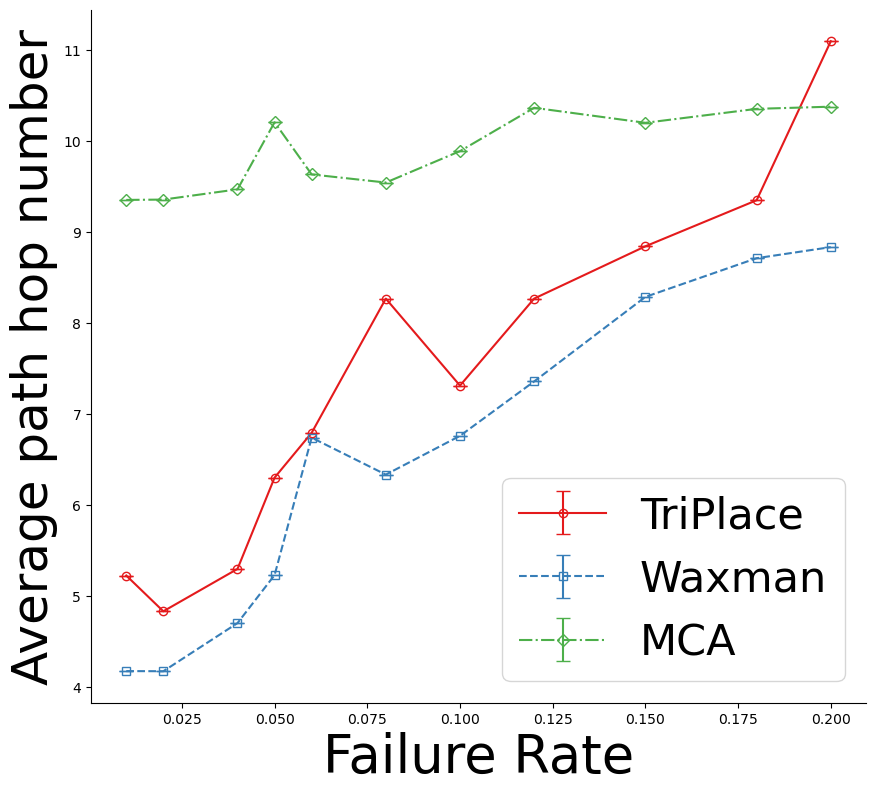

In [69]:
# Averge hop number of shortest path vs. failure rate
import os
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from topo_resilience_eval import G_removed_edges
from config import abs_file_path

# 定义参数
topologies = ["deepPlace", "waxman", "mca"]
node_count = 100
topo_indices = range(1)
failure_rates = [0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15, 0.18, 0.20]
default_length = 30

# 初始化存储结果的结构
results = {topo: {fr: [] for fr in failure_rates} for topo in topologies}

# 读取文件并计算每个failure_rate下的最短路径跳数
for topo in topologies:
    for topo_idx in topo_indices:
        for failure_rate in failure_rates:
            file_name = f"{topo}-{node_count}-{topo_idx}.json"
            file_abs_path = abs_file_path + "/dist/topos/" + file_name
            if os.path.exists(file_abs_path):
                G = G_removed_edges(file_name, failure_rate)
                path_lengths = []
                for source in range(node_count):
                    for target in range(node_count):
                        if source != target:
                            try:
                                length = nx.shortest_path_length(G, source=source, target=target)
                            except nx.NetworkXNoPath:
                                length = default_length
                            path_lengths.append(length)
                if path_lengths:
                    avg_path_length = np.mean(path_lengths)
                    results[topo][failure_rate].append(avg_path_length)

# 计算平均值和标准差
avg_results = {topo: [] for topo in topologies}
std_results = {topo: [] for topo in topologies}
for topo in topologies:
    for failure_rate in failure_rates:
        avg_results[topo].append(np.mean(results[topo][failure_rate]))
        std_results[topo].append(np.std(results[topo][failure_rate]))

# 绘制图形
plt.figure(figsize=(10, 9))
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', 'D', '^']
# colors = ['b', 'g', 'r', 'c']
colors = sns.color_palette("Set1", len(topologies))

for i, topo in enumerate(topologies):
    plt.errorbar(failure_rates, avg_results[topo], yerr=std_results[topo], 
                 label=topo, linestyle=line_styles[i % len(line_styles)], 
                 markerfacecolor='none', 
                 marker=marker_styles[i % len(marker_styles)], color=colors[i % len(colors)], capsize=5)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

plt.xlabel('Failure Rate', fontsize=38)
plt.ylabel('Average path hop number', fontsize=36)
ax.set_xticks(failure_rates)
ax.set_xticklabels(failure_rates, fontsize=36)
# ax.set_yticks(range(4, 15, 2)) 
ax.set_yticklabels(range(4, 15, 2), fontsize=36)
# plt.title('Average Shortest Path Hop Count vs Failure Rate for Different Topologies')

plt.legend(loc='best', fontsize=31, labels=[lengendMapping[name] for name in names])
# plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-hop_penalty_failure.pdf", transparent=True)

plt.show()


/tmp/ipykernel_2757840/4226933550.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(4, 15, 2), fontsize=31)


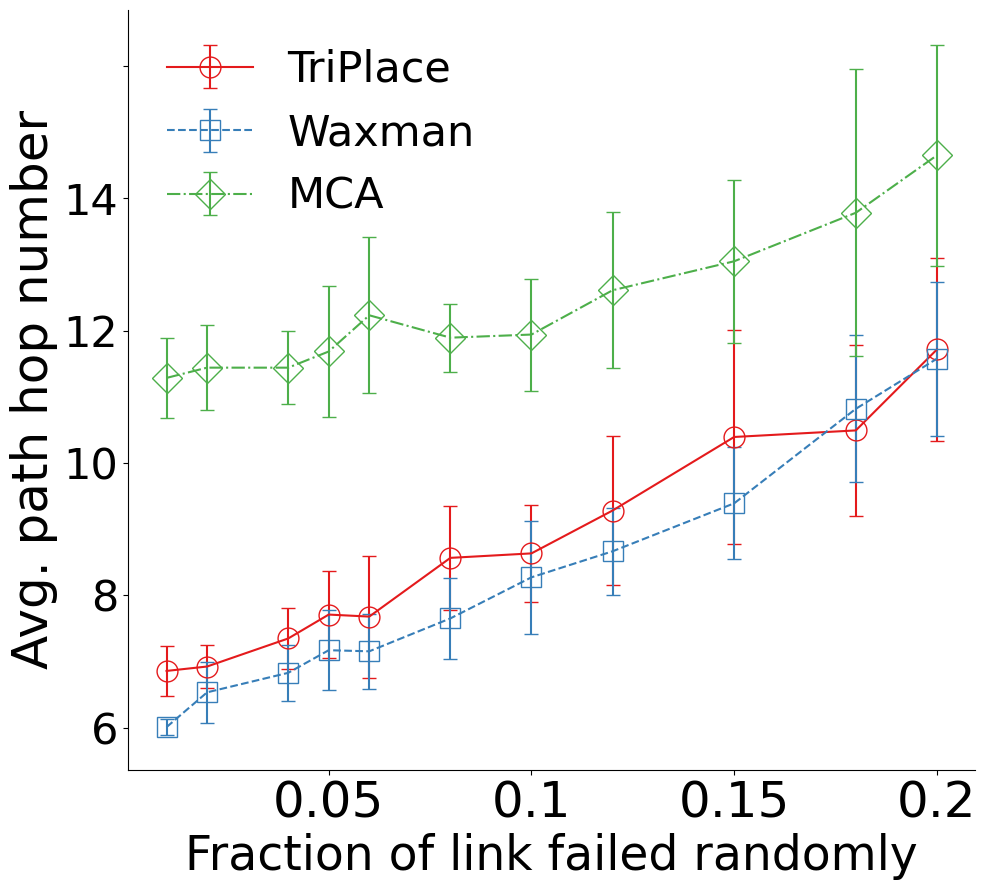

In [29]:
import os
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from topo_resilience_eval import G_removed_edges
from config import abs_file_path

# 定义参数
topologies = ["deepPlace", "waxman", "mca"]
node_count = 100
topo_indices = range(10)
failure_rates = [0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15, 0.18, 0.20]
default_length = 30

# 初始化存储结果的结构
results = {topo: {fr: [] for fr in failure_rates} for topo in topologies}

# 读取文件并计算每个failure_rate下的最短路径跳数
for topo in topologies:
    for topo_idx in topo_indices:
        for failure_rate in failure_rates:
            file_name = f"{topo}-{node_count}-{topo_idx}.json"
            file_abs_path = abs_file_path + "/dist/topos/" + file_name
            if os.path.exists(file_abs_path):
                G = G_removed_edges(file_name, failure_rate)
                path_lengths = []
                for source in range(node_count):
                    for target in range(node_count):
                        if source != target:
                            try:
                                length = nx.shortest_path_length(G, source=source, target=target)
                            except nx.NetworkXNoPath:
                                length = default_length
                            path_lengths.append(length)
                if path_lengths:
                    avg_path_length = np.mean(path_lengths)
                    results[topo][failure_rate].append(avg_path_length)

# 计算平均值和标准差
avg_results = {topo: [] for topo in topologies}
std_results = {topo: [] for topo in topologies}
for topo in topologies:
    for failure_rate in failure_rates:
        avg_results[topo].append(np.mean(results[topo][failure_rate]))
        std_results[topo].append(np.std(results[topo][failure_rate]))

# 绘制图形
plt.figure(figsize=(10, 9))
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', 'D', '^']
colors = sns.color_palette("Set1", len(topologies))

for i, topo in enumerate(topologies):
    plt.errorbar(failure_rates, avg_results[topo], yerr=std_results[topo], 
                 label=topo, linestyle=line_styles[i % len(line_styles)], 
                 markerfacecolor='none', 
                 marker=marker_styles[i % len(marker_styles)], color=colors[i % len(colors)], capsize=5,
                 markersize=15)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

plt.xlabel('Fraction of link failed randomly', fontsize=34)
plt.ylabel('Avg. path hop number', fontsize=36)

# 获取当前轴
ax = plt.gca()

# 设置刻度和刻度标签字体大小
ax.set_xticks([0.05, 0.10, 0.15, 0.20])
ax.set_xticklabels([0.05, 0.10, 0.15, 0.20], fontsize=36)
# ax.set_yticks(range(4, 15, 2)) 
ax.set_yticklabels(range(4, 15, 2), fontsize=31)

plt.legend(loc='best', fontsize=31, labels=[lengendMapping[name] for name in topologies], frameon=False)

# 隐藏顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-hop_penalty_failure.pdf", transparent=True)

plt.show()



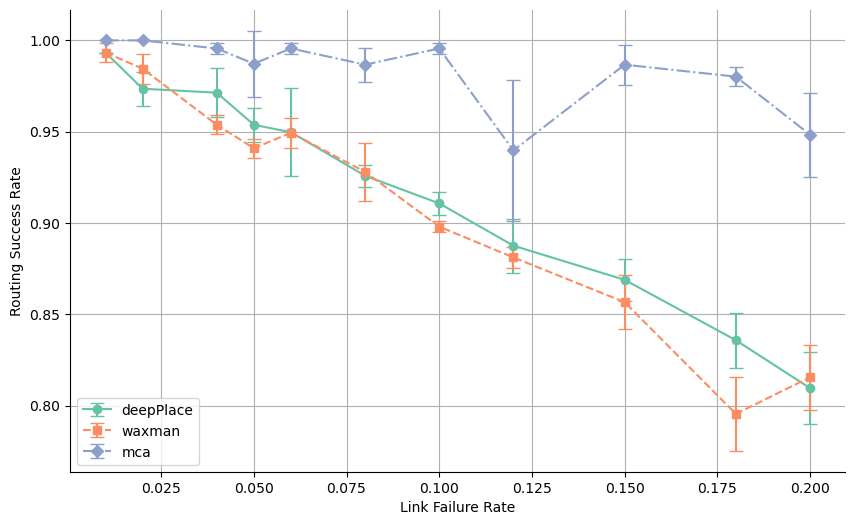

In [49]:
# Routing success rate vs. failure rate
import json
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from topo_resilience_eval import G_removed_edges
from config import abs_file_path

# 配色和样式
# colors = ['b', 'g', 'r', 'c']
colors = sns.color_palette("Set2", 4)
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
topo_names = ["deepPlace", "waxman", "mca"]
failure_rates = [0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15, 0.18, 0.20]
endnode_num = 100
topo_num = 10

def read_graph(file_name):
    with open(file_name, 'r') as f:
        data = json.load(f)
    return nx.node_link_graph(data)

def calculate_shortest_paths(graph, endnode_num):
    total_pairs = endnode_num * (endnode_num - 1)
    found_paths = 0
    for source in range(endnode_num):
        for target in range(endnode_num):
            if source != target:
                try:
                    _ = nx.shortest_path_length(graph, source=source, target=target)
                    found_paths += 1
                except nx.NetworkXNoPath:
                    continue
    return found_paths / total_pairs

results = {name: {fr: [] for fr in failure_rates} for name in topo_names}

for name in topo_names:
    for topo_idx in range(2, 5):
        file_path = abs_file_path + "/dist/topos/" #+ f"{name}-100-{topo_idx}.json"
        file_name = f"{name}-100-{topo_idx}.json"
        if os.path.exists(file_path + file_name):
            original_graph = read_graph(file_path + file_name)
        else:
            continue
        for failure_rate in failure_rates:
            avg_ratio = 0
            try_times = 3
            for _ in range(try_times):
                modified_graph = G_removed_edges(file_name, failure_rate)
                ratio = calculate_shortest_paths(modified_graph, endnode_num)
                avg_ratio += ratio
            # results[name][failure_rate].append(ratio)
            results[name][failure_rate].append(avg_ratio / try_times)

averages = {name: [np.mean(results[name][fr]) for fr in failure_rates] for name in topo_names}
std_devs = {name: [np.std(results[name][fr]) for fr in failure_rates] for name in topo_names}

plt.figure(figsize=(10, 6))
for i, name in enumerate(topo_names):
    plt.errorbar(failure_rates, averages[name], yerr=std_devs[name], label=name,
                 color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)],
                 marker=markers[i % len(markers)], capsize=5)

plt.xlabel('Link Failure Rate')
plt.ylabel('Routing Success Rate')
# plt.title('Proportion of Reachable Pairs vs. Failure Rate for Different Topologies')
plt.legend()
plt.grid(True)

# 只保留 x 轴和 y 轴，去除其他边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-rt_scc_rate_failure.pdf", transparent=True)

plt.show()


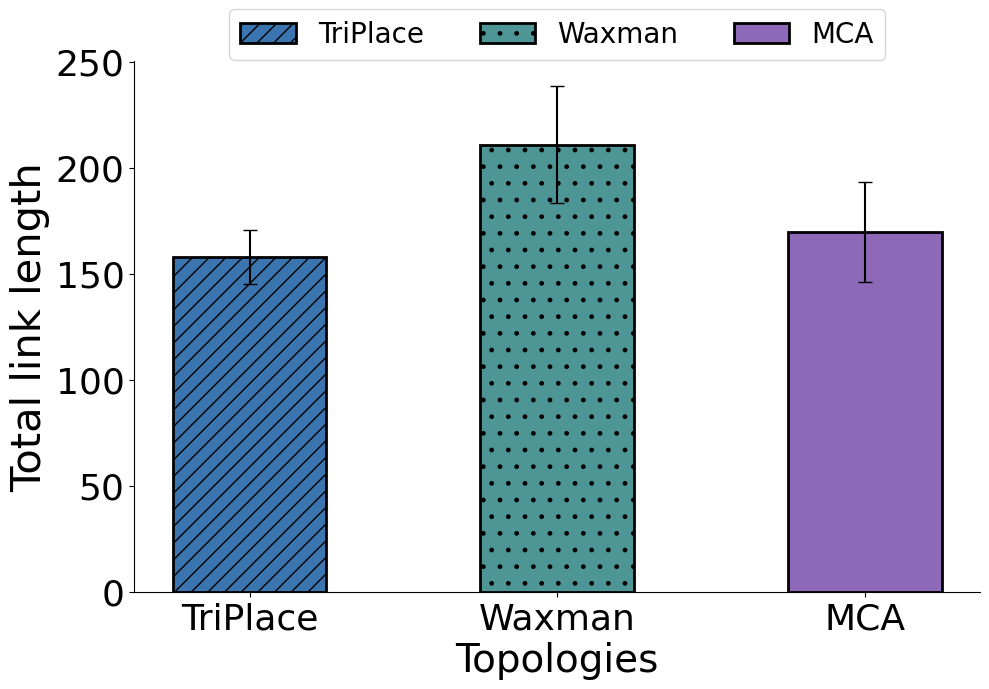

In [37]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from config import abs_file_path

# 定义名称和拓扑索引
names = ["deepPlace", "waxman", "mca"]
topo_indices = range(10)

# 存储每个拓扑的链路总长度
total_lengths = {name: [] for name in names}

# 读取 JSON 文件并提取边的属性 'dis'
for name in names:
    for topo_idx in topo_indices:
        filename = abs_file_path + "/dist/topos/" + f"{name}-100-{topo_idx}.json"
        if os.path.exists(filename):
            with open(filename, 'r') as f:
                data = json.load(f)
                G = nx.node_link_graph(data)
                # 计算每个拓扑的链路总长度
                total_length = sum(attr['dis'] for u, v, attr in G.edges(data=True) if 'dis' in attr)
                total_lengths[name].append(total_length/200)

# 计算每个拓扑的平均值和标准差
means = [np.mean(total_lengths[name]) for name in names]
stds = [np.std(total_lengths[name]) for name in names]

# 绘制不同拓扑的链路总长度
plt.figure(figsize=(10, 7))
# colors = sns.color_palette("Set1", len(names))
colors = ["#3b75af", "#4e9595", "#8d69b8"]
bar_hatch = ['//', '.', '']
x = np.arange(len(names))
bars = plt.bar(x, means, yerr=stds, color=colors, capsize=5, linewidth=2, edgecolor='black', hatch=bar_hatch, width=0.5)

lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

plt.xlabel('Topologies', fontsize=28)
plt.ylabel('Total link length', fontsize=30)
plt.xticks(x, [lengendMapping[name] for name in names], fontsize=26)
plt.yticks(fontsize=26)

# 添加图例
plt.legend(bars, [lengendMapping[name] for name in names], fontsize=20, frameon=True, bbox_to_anchor=(0.5, 1.05), ncol=4, loc='center')

plt.tight_layout()

save_path = "../dist/figs/"
sns.despine()
plt.savefig(save_path + "fig-total_link_length.pdf", transparent=True)
plt.show()


/tmp/ipykernel_2997425/1499409489.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=20)


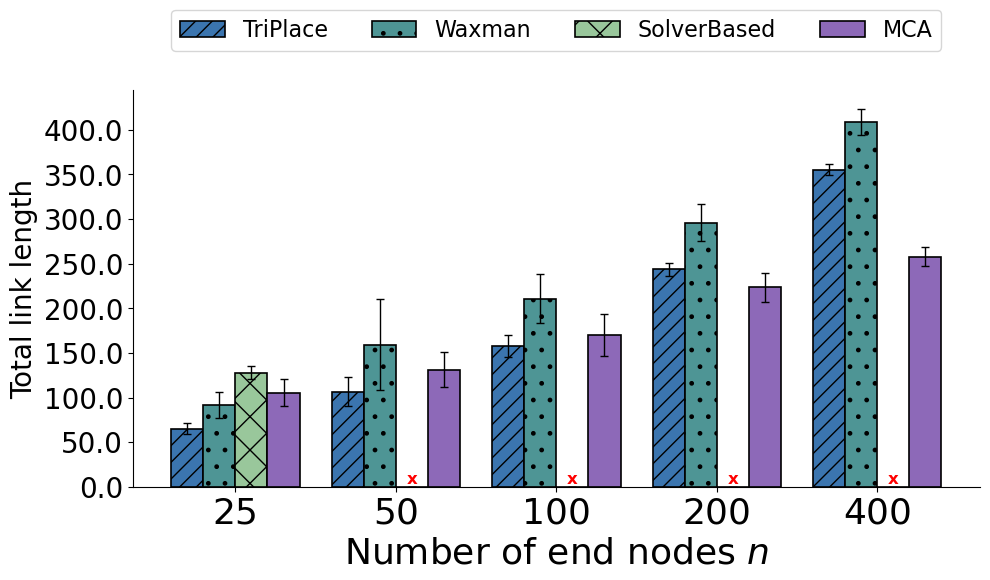

In [39]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "solverBased", "mca"]
n_values = [25, 50, 100, 200, 400]
topo_indices = range(10)
dir_path = "../dist/topos/"

# 初始化存储结果的字典
results = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取总链路长度
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    total_length = sum(attr['dis'] for u, v, attr in G.edges(data=True) if 'dis' in attr)
                    results[name][n].append(total_length/200)

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = results[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)  # 使用标准差作为误差条
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = ["#3b75af", "#4e9595", "#99c79b", "#8d69b8"]
bar_hatch = ['//', '.', 'x', '']
# 绘制柱状图和误差条
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1), hatch=bar_hatch[i], edgecolor='black', linewidth=1.2)

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of end nodes $n$', fontsize=26)
ax.set_ylabel('Total link length', fontsize=20)
# ax.set_title('Total Link Length vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values, fontsize=26)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)
lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

ax.legend(fontsize=16, loc='center', bbox_to_anchor=(0.5, 1.15), ncol=4, labels=[lengendMapping[name] for name in names])

# 优化图形显示效果
sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-n_vs_total_link_length.pdf", transparent=True)
plt.show()
